Кейс 8  
Участники:   
Казанцев Данила   
Ходченков Артем   
Мандзулашвили Гогита     
Василинич Андрей    
Друхольский Александр    
Козлова Анна    

# EDA

## Загрузка данных, анализ распределений, поиск пропущенных значений и выбросов, проверка типов данных

### Загрузка данных

Загрузка датасета с kaggle

In [ ]:
!kaggle competitions download -c playground-series-s3e11 -p ../data/raw


  0%|          | 0.00/9.00M [00:00<?, ?B/s]
100%|██████████| 9.00M/9.00M [00:00<00:00, 1.05GB/s]
"--unzip" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


Распаковка архива

In [7]:
import zipfile

z= zipfile.ZipFile('../data/raw/playground-series-s3e11.zip')
z.extractall(path='../data/raw/')

### Проверка данных

Узнаем размер датасета, типы данных и выведем пример данных

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/raw/train.csv')

int_columns = [
    'coffee_bar',
    'video_store',
    'salad_bar',
    'prepared_food',
    'florist',
    'recyclable_package',
    'low_fat'
]

df[int_columns] = df[int_columns].astype('int64')

rename_dict = {
    'store_sales(in millions)': 'Store_sales(in millions) Description "store_sales(in million dollars)"',
    'unit_sales(in millions)': 'Unit_sales(in millions) Description "unit_sales(in millions) in stores Quantity"',
    'total_children': 'Total_children Description "TOTAL CHILDREN IN HOME"',
    'num_children_at_home': 'Num_children_at_home Description "num_children_at_home AS PER CUSTOMERS FILLED DETAILS"',
    'avg_cars_at home(approx).1': 'avg_cars_at home(approx) Description "avg_cars_at home(approx)"',
    'gross_weight': 'Gross_weight Description "gross_weight OF ITEM"',
    'recyclable_package': 'Recyclable_package Description "FOOD ITEM IS recyclable_package"',
    'low_fat': 'Low_fat Description "LOW_FAT FOOD ITEM IS LOW FAT"',
    'units_per_case': 'Units_per_case Description "UNITS/CASE UNITS AVAILABLE IN EACH STORE SHELVES"',
    'store_sqft': 'Store_sqft Description "STORE AREA AVAILABLE IN SQFT"',
    'coffee_bar': 'Coffee_bar Description "COFFEE BAR available in store"',
    'video_store': 'Video_store Description "VIDEO STORE/gaming store available"',
    'salad_bar': 'Salad_bar Description "SALAD BAR available in store"',
    'prepared_food': 'Prepared_food Description "food prepared available in store"',
    'florist': 'Florist Description "flower shelves available in store"',
    'cost': 'Cost Description "COST ON ACQUIRING A CUSTOMERS in dollars"'
}

print("Размер датасета:", df.shape, "\n")

print("Типы данных:", df.dtypes, "\n")

print("Первые 5 строк:")
display(df.head())

Размер датасета: (360336, 17) 

Типы данных: id                              int64
store_sales(in millions)      float64
unit_sales(in millions)       float64
total_children                float64
num_children_at_home          float64
avg_cars_at home(approx).1    float64
gross_weight                  float64
recyclable_package              int64
low_fat                         int64
units_per_case                float64
store_sqft                    float64
coffee_bar                      int64
video_store                     int64
salad_bar                       int64
prepared_food                   int64
florist                         int64
cost                          float64
dtype: object 

Первые 5 строк:


,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,0,8.61,3.0,2.0,2.0,2.0,10.30,1,0,32.0,36509.0,0,0,0,0,0,62.09
1,1,5.00,2.0,4.0,0.0,3.0,6.66,1,0,1.0,28206.0,1,0,0,0,0,121.80
2,2,14.08,4.0,0.0,0.0,3.0,21.30,1,0,26.0,21215.0,1,0,0,0,0,83.51
3,3,4.02,3.0,5.0,0.0,0.0,14.80,0,1,36.0,21215.0,1,0,0,0,0,66.78
4,4,2.13,3.0,5.0,0.0,3.0,17.00,1,1,20.0,27694.0,1,1,1,1,1,111.51


Проверим наличие пропусков значений в данных

In [2]:
total_missed = df.isna().sum().sum()
percentage_missed = (total_missed / len(df)) * 100

print("Пропущенные значения:")
print("Общее количество:", total_missed)
print("В процентном соотношении:", percentage_missed)

Пропущенные значения:
Общее количество: 0
В процентном соотношении: 0.0


Соберём статистическое описание числовых переменных

In [3]:
numeric_columns = [
    'store_sales(in millions)', 
    'unit_sales(in millions)', 
    'total_children', 
    'num_children_at_home', 
    'avg_cars_at home(approx).1',
    'gross_weight',
    'units_per_case', 
    'store_sqft',
    'cost'
]

distribution_analysis = []

for col in numeric_columns:
    if col in df.columns:
        distribution_analysis.append({
            'Переменная': col,
            'Среднее': df[col].mean(),
            'Медиана': df[col].median(),
            'Стандартное отклонение': df[col].std(),
            'Минимум': df[col].min(),
            'Максимум': df[col].max(),
            'Эксцесс': df[col].kurtosis(),
            'Коэф. вариации %': (df[col].std() / df[col].mean()) * 100,
            'Асимметрия': df[col].skew(),
            'Описание асимметрии': 'Правая' if df[col].skew() > 0.5 else 'Левая' if df[col].skew() < -0.5 else 'Симметричная'
        })

dist_df = pd.DataFrame(distribution_analysis)
display(dist_df.round(4))

,Переменная,Среднее,Медиана,Стандартное отклонение,Минимум,Максимум,Эксцесс,Коэф. вариации %,Асимметрия,Описание асимметрии
0,store_sales(in millions),6.3374,5.78,3.3080,0.51,22.92,0.0752,52.1979,0.6615,Правая
1,unit_sales(in millions),3.0439,3.00,0.7847,1.00,6.00,-0.2501,25.7788,-0.1080,Симметричная
2,total_children,2.4565,2.00,1.4890,0.00,5.00,-1.0395,60.6148,0.0351,Симметричная
3,num_children_at_home,0.6894,0.00,1.2147,0.00,5.00,2.5983,176.2040,1.8487,Правая
4,avg_cars_at home(approx).1,2.2038,2.00,1.0843,0.00,4.00,-0.7622,49.2008,-0.0734,Симметричная
5,gross_weight,13.8221,13.60,4.6148,6.00,21.90,-1.2321,33.3871,0.0933,Симметричная
6,units_per_case,18.9727,20.00,10.2129,1.00,36.00,-1.2445,53.8295,-0.1020,Симметричная
7,store_sqft,28180.3334,27694.00,5968.8741,20319.00,39696.00,-1.0730,21.1810,0.3927,Симметричная
8,cost,99.6147,98.81,29.9394,50.79,149.75,-1.2633,30.0552,0.0191,Симметричная


### Выводы по описательной статистике

1. **Продажи и количество проданных единиц**
   - `store_sales(in millions)`<span style="color:Orange; text-decoration:underline;">имеет среднее 6.33 и медиану 5.78. Асимметрия правая → встречаются магазины с существенно большими продажами.  </span>
   - `unit_sales(in millions)` показывает симметричное распределение, значения от 1 до 6, вариация умеренная (≈26%).  
   → Оба признака содержат полезную информацию о размерах магазинов и объёмах продаж.

2. **Характеристики семьи (total_children, num_children_at_home)**
   - `total_children` — почти симметричное распределение, 0–5 детей, среднее ≈2.45.  
   - `num_children_at_home` <span style="color:red; text-decoration:underline;">— сильная правая асимметрия (1.84) и очень высокая вариативность (176%).  
   → Большинство семей имеют 0 детей дома, а с увелечением их количества умешается и частота. Это важная характеристика сегмента клиентов.</span>

3. **Автомобили и вес товара**
   - `avg_cars_at home(approx).1` — распределение почти симметричное.  
   - `gross_weight` — равномерное распределение с умеренной вариацией.  
   → Признаки стабильные, аномалий не наблюдается.

4. **Упаковка и единицы товара**
   - `units_per_case` — умеренная вариативность (CV ≈ 53%), симметричный признак.  
   → Параметр товаров различается существенно, что может влиять на стоимость.


5. **Площадь магазина**
   - `store_sqft` — практически симметричное распределение (CV ≈ 21%).  
   → Магазины довольно схожи по размеру.

6. **Стоимость привлечения клиента (Cost)**
   - `cost` — диапазон 50–150 долларов, симметричное распределение, умеренная вариация (CV ≈ 30%).  
   → Целевая переменная распределена достаточно равномерно; явных перекосов нет.

### Общий итог
- Большинство признаков имеют **симметричное или близкое к симметричному** распределение.  
- Явно выделяются признаки со **значительной правой асимметрией**: `store_sales(in millions)` и особенно `num_children_at_home`.  
- Высокий коэффициент вариации у `num_children_at_home` указывает на значительную неоднородность семейной структуры клиентов.  
- Выбросов по диапазонам значений не наблюдается — все признаки выглядят реалистично.
- Учесть правую асимметрию (`store_sales`, `num_children_at_home`) — возможно, использовать лог-трансформацию или стандартизацию.  
- Признаки с высокой вариативностью могут сильно влиять на модель — стоит проанализировать их важность.

In [4]:
outliers_analysis = []

for col in numeric_columns:
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_count = len(outliers)
        outliers_percent = (outliers_count / len(df)) * 100
        
        outliers_analysis.append({
            'Переменная': col,
            'Q1': Q1,
            'Q3': Q3,
            'IQR': IQR,
            'Нижняя граница': lower_bound,
            'Верхняя граница': upper_bound,
            'Количество выбросов': outliers_count,
            'Процент выбросов %': outliers_percent
        })

outliers_df = pd.DataFrame(outliers_analysis)
display(outliers_df.round(4))

,Переменная,Q1,Q3,IQR,Нижняя граница,Верхняя граница,Количество выбросов,Процент выбросов %
0,store_sales(in millions),3.72,8.40,4.68,-3.300,15.420,3442,0.9552
1,unit_sales(in millions),3.00,4.00,1.00,1.500,5.500,6796,1.8860
2,total_children,1.00,4.00,3.00,-3.500,8.500,0,0.0000
3,num_children_at_home,0.00,1.00,1.00,-1.500,2.500,39191,10.8762
4,avg_cars_at home(approx).1,1.00,3.00,2.00,-2.000,6.000,0,0.0000
5,gross_weight,9.71,17.70,7.99,-2.275,29.685,0,0.0000
6,units_per_case,10.00,28.00,18.00,-17.000,55.000,0,0.0000
7,store_sqft,23593.00,33858.00,10265.00,8195.500,49255.500,0,0.0000
8,cost,70.32,126.62,56.30,-14.130,211.070,0,0.0000


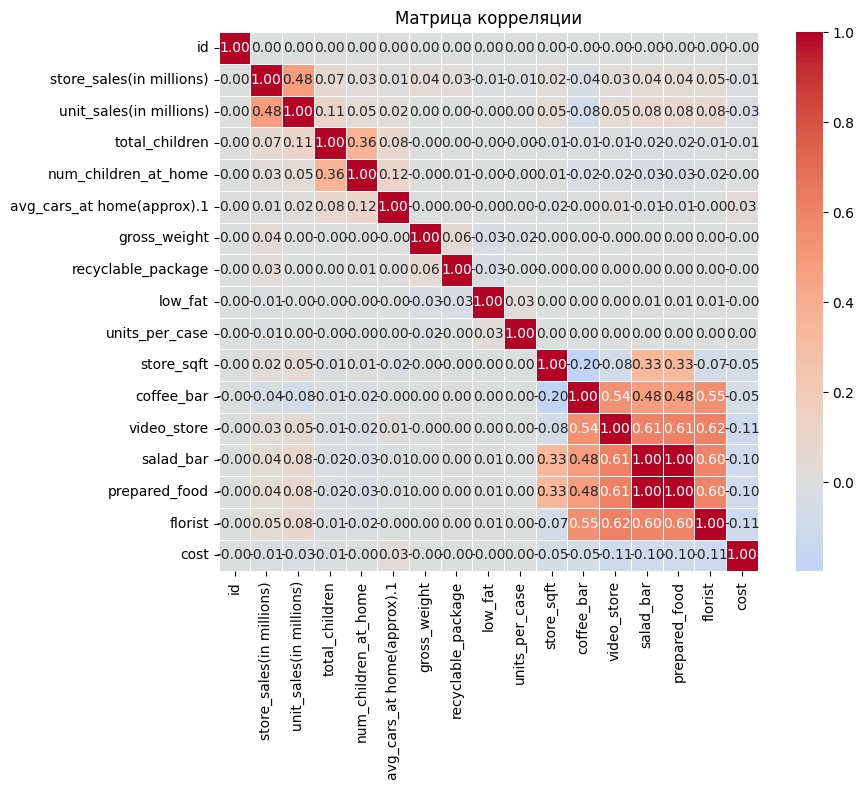

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), 
            annot=True,        
            cmap='coolwarm',   
            center=0,          
            square=True,       
            fmt='.2f',         
            linewidths=0.5)    
plt.title('Матрица корреляции')
plt.tight_layout()
plt.show()


## Создание графиков (распределения, корреляции, boxplots), формулировка гипотез о влиянии признаков на target